In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
import os
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

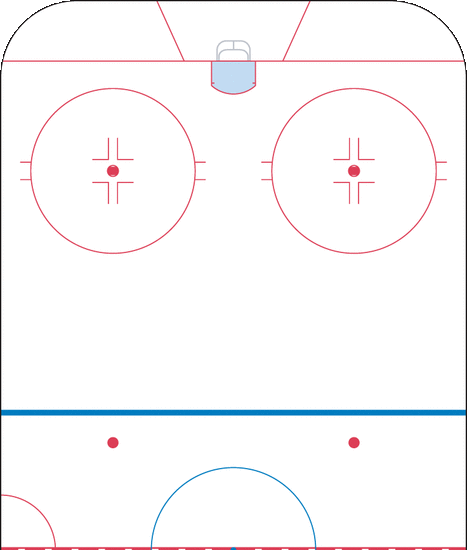

In [31]:
from PIL import Image
img = Image.open('nhl_rink.png')
nimg = img.crop((0, 0, (img.size[0]/2), img.size[1]))
nimg= nimg.rotate(-90, expand=True)
# nimg.show()
nimg

In [47]:
def advance_visualization(team,year):
    global team_df
    team_df = pd.read_csv('data/'+year+'_team.csv')
    league_df = pd.read_csv('data/'+year+'_league.csv')
    team_df['y'] = team_df['y_transformed']+45 #from 0 to 85
    league_df['y'] = league_df['y_transformed']+45 #from 0 to 85
    team_df['team_av_smooth'] = gaussian_filter(team_df['average_per_hour'], sigma=3)
    league_df['league_av_smooth'] = gaussian_filter(league_df['average_per_hour'], sigma=3)
    team_df = team_df.loc[team_df['team'] == team]
    team_rink = np.zeros((91, 86))
    for i in range(0, 91): 
        for j in range(0, 86): 
            if team_df.loc[(team_df['goal_dist'] == i) & (team_df['y'] ==j), 'average_per_hour'].shape[0] != 0:
                team_rink[i][j] = np.around(team_df.loc[(team_df['goal_dist'] == i) & (team_df['y'] ==j), 'average_per_hour'].values[0],4)

    
    league_rink = np.zeros((91, 86))
    for i in range(0, 91): 
        for j in range(0, 86): 
            if league_df.loc[(league_df['goal_dist'] == i) & (league_df['y'] ==j), 'average_per_hour'].shape[0] != 0:
                league_rink[i][j] = np.around(league_df.loc[(league_df['goal_dist'] == i) & (league_df['y'] ==j), 'average_per_hour'].values[0],4)

    diff = team_rink - league_rink
    diff = gaussian_filter(diff, sigma=3)
    diff = (2*(diff - np.nanmin(diff))/(np.nanmax(diff) - np.nanmin(diff))) -1

    x, y = np.arange(86), np.arange(91)

    vmin = np.min(diff)
    vmax = np.max(diff)
    print(vmin, vmax)


    def plot_image():
        # Step 1: Create the figure
        fig,ax = plt.subplots(figsize=(10,5))
        plot = ax.contourf(x, y, diff, alpha = 0.5, levels=5,  cmap='bwr', origin='upper')
        ax.imshow(nimg, extent=[0,85,91,-10])
        # Step 4: Set the axis limits
        ax.set_xlim(0,85)
        fig.colorbar(plot, pad=0.05)
    
        ax.set_ylim(91,-10)
        # Step 5: Set the axis labels
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        # Step 6: Set the title
        ax.set_title('Shot Density - '+team)
        # Step 7: Show the plot
        plt.show()


    plot_image()




-1.0 1.0


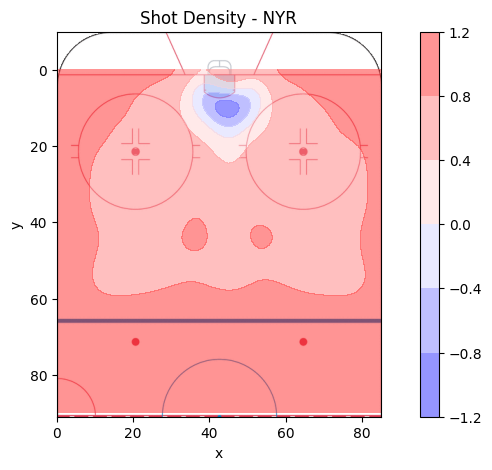

In [40]:
# advance_visualization('NYR')

In [48]:
# Creating a dropdown widget with team names as options and a button to plot the image
team_dropdown = widgets.Dropdown(options=team_df['team'].unique(), description='Team')
year_dropdown = widgets.Dropdown(options=['2016','2017','2018','2019','2020'], description='Year')
widgets.interactive(advance_visualization, team=team_dropdown, year=year_dropdown)


interactive(children=(Dropdown(description='Team', options=('Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins…